In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv(r"c:\Users\ankit\Downloads\Churn-Data (1).csv")

In [3]:
data.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [4]:
data.shape

(5634, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
data.columns.values

array(['cID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'TV_Streaming', 'Movie_Streaming', 'Contract',
       'PaperlessBilling', 'Method_Payment', 'Charges_Month',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
data = data.drop(['cID'],axis=1)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [9]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
TV_Streaming         0
Movie_Streaming      0
Contract             0
PaperlessBilling     0
Method_Payment       0
Charges_Month        0
TotalCharges        10
Churn                0
dtype: int64

In [10]:
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
4,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
282,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2419,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2734,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
2903,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3974,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5023,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5030,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5343,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5599,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [11]:
data[data['tenure'] == 0].index

Index([4, 282, 2419, 2734, 2903, 3974, 5023, 5030, 5343, 5599], dtype='int64')

In [12]:
data.drop(labels=data[data['tenure']==0].index, axis=0,inplace=True)
data[data['tenure']==0].index

Index([], dtype='int64')

In [13]:
data.fillna(data['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
5,Male,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5630,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5631,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5632,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [14]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
TV_Streaming        0
Movie_Streaming     0
Contract            0
PaperlessBilling    0
Method_Payment      0
Charges_Month       0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,No,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,Female,No,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,No,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,No,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
5,Male,No,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No


In [16]:
data["InternetService"].describe(include=['object', 'bool'])

count            5624
unique              3
top       Fiber optic
freq             2481
Name: InternetService, dtype: object

In [17]:
numerical_cols = ['tenure', 'Charges_Month', 'TotalCharges']
data[numerical_cols].describe()

,tenure,Charges_Month,TotalCharges
count,5624.000000,5624.000000,5624.000000
mean,32.430654,64.911620,2291.154605
std,24.408029,30.081601,2263.151534
min,1.000000,18.250000,18.800000
25%,9.000000,35.800000,411.512500
50%,29.000000,70.550000,1410.800000
75%,55.000000,89.950000,3808.850000
max,72.000000,118.600000,8684.800000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [20]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["gender"]).count()
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["gender"]).count()

gender
Female    744
Male      752
Name: Churn, dtype: int64

In [21]:
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [22]:
labels = data['Method_Payment'].unique()
values = data['Method_Payment'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [23]:
fig = px.histogram(data, x="Churn", color="Method_Payment", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [24]:
data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [25]:
data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       806
Fiber optic      No       749
No               No       574
Fiber optic      Yes      502
DSL              Yes      201
No               Yes       49
Name: count, dtype: int64

C:\Users\ankit\AppData\Local\Temp\ipykernel_12768\435691807.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ankit\AppData\Local\Temp\ipykernel_12768\435691807.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-pack

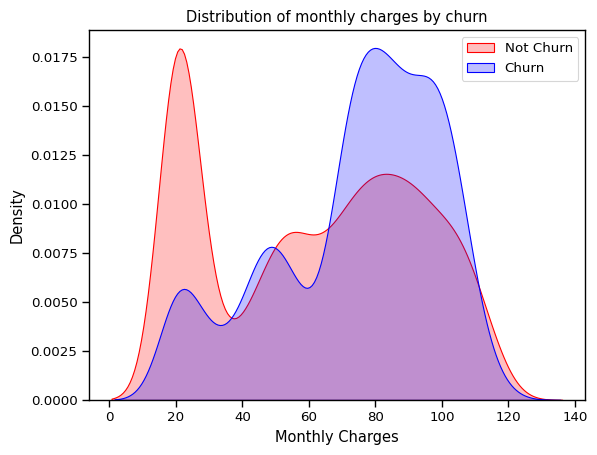

In [26]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Charges_Month[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.Charges_Month[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

C:\Users\ankit\AppData\Local\Temp\ipykernel_12768\1919219197.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ankit\AppData\Local\Temp\ipykernel_12768\1919219197.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-pa

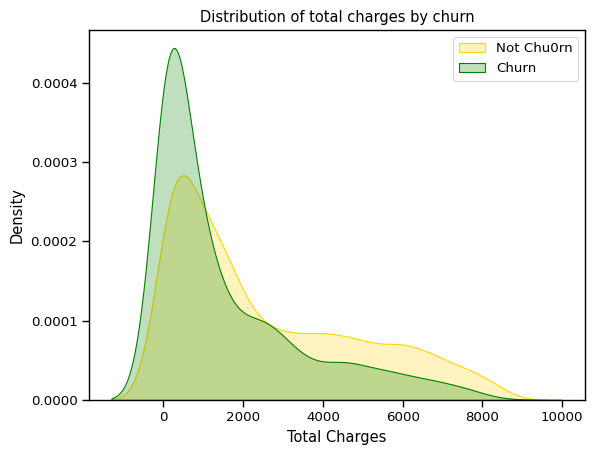

In [27]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [28]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


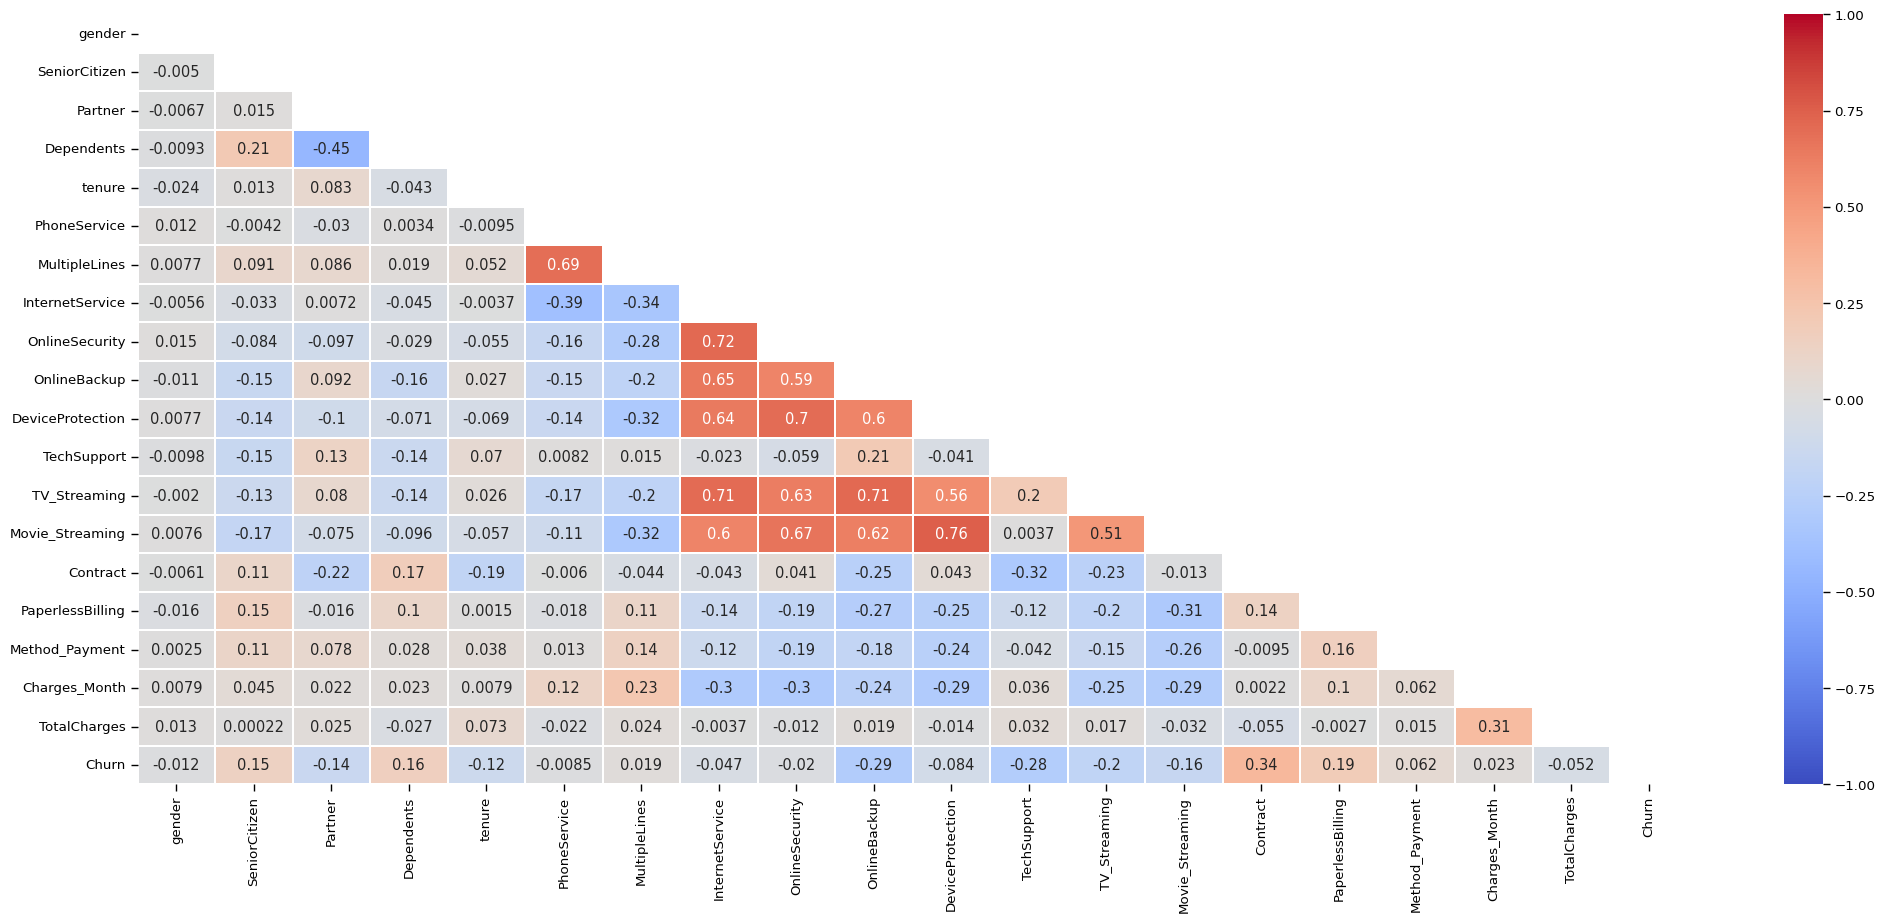

In [29]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [32]:
data = data.apply(lambda x : object_to_int(x))


In [33]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80,0
1,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45,0
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95,1
5,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,2,69.55,521.35,0


In [34]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [36]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data[numerical_cols].astype('float64')),
                       columns=numerical_cols)


In [37]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(numerical_cols) - set(cat_cols_ohe)) #those that need label encoding

In [38]:
scaler= StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [39]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [40]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
y_pred=model_rf.predict(X_test)

In [58]:
model_rf.score(X_test,y_test)

0.7786666666666666

In [43]:
from imblearn.combine import SMOTEENN

In [44]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [45]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [46]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [47]:

model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [48]:

yr_predict1 = model_rf_smote.predict(xr_test1)

In [49]:

model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [50]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9347826086956522
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       415
           1       0.93      0.95      0.94       505

    accuracy                           0.93       920
   macro avg       0.94      0.93      0.93       920
weighted avg       0.93      0.93      0.93       920



In [51]:

print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[379  36]
 [ 24 481]]


In [52]:
import pickle

filename = 'ccpmodel.sav'

In [53]:
pickle.dump(model_rf_smote,open(filename,'wb'))

In [54]:
load_model = pickle.load(open(filename,'rb'))

In [55]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [56]:
model_score_r1

0.9347826086956522

In [57]:
import streamlit as st